In [78]:
import pandas as pd
db = pd.read_csv('Italy.csv',sep=',')

In [82]:
db = db.rename(columns={'OdName':'Country','AreaName':'Region'})
db = db.drop(['Coverage'],axis=1)
len(db)

392

In [84]:
db.head()

,Type,Country,Region,1986,1987,1988,1989,1990,1991,1992,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Afghanistan,Asia,..,..,..,..,..,..,..,...,10,6,18,8,12,14,16,20,18,34
1,Emigrants,Albania,Europe,..,..,..,..,..,..,..,...,800,974,1008,865,993,1159,1529,1568,1885,2336
2,Emigrants,Algeria,Africa,..,..,222,145,126,69,63,...,115,163,153,159,196,204,204,192,202,215
3,Emigrants,Andorra,Europe,..,..,..,..,..,..,..,...,1,2,1,6,13,12,4,3,7,3
4,Emigrants,Angola,Africa,..,..,..,..,..,..,..,...,59,50,71,36,33,33,52,39,51,42


In [3]:
db_emigrants = db[db['Type'].isin(['Emigrants'])]
db_emigrants.head()

,Type,Country,Region,1986,1987,1988,1989,1990,1991,1992,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Afghanistan,Asia,..,..,..,..,..,..,..,...,10,6,18,8,12,14,16,20,18,34
1,Emigrants,Albania,Europe,..,..,..,..,..,..,..,...,800,974,1008,865,993,1159,1529,1568,1885,2336
2,Emigrants,Algeria,Africa,..,..,222,145,126,69,63,...,115,163,153,159,196,204,204,192,202,215
3,Emigrants,Andorra,Europe,..,..,..,..,..,..,..,...,1,2,1,6,13,12,4,3,7,3
4,Emigrants,Angola,Africa,..,..,..,..,..,..,..,...,59,50,71,36,33,33,52,39,51,42


In [4]:
db_immigrants = db[db['Type'].isin(['Immigrants'])]
db_immigrants.head()

,Type,Country,Region,1986,1987,1988,1989,1990,1991,1992,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
194,Immigrants,Afghanistan,Asia,..,..,..,..,..,..,..,...,63,149,182,854,1193,1028,701,843,1114,1177
195,Immigrants,Albania,Europe,..,..,..,..,..,..,..,...,39430,28588,23553,23470,36036,27737,22749,16724,14205,12279
196,Immigrants,Algeria,Africa,..,..,..,..,990,554,392,...,2852,1243,1048,1012,1431,1195,1271,1189,1002,978
197,Immigrants,Andorra,Europe,..,..,..,..,..,..,..,...,17,5,15,12,5,3,73,46,57,6
198,Immigrants,Angola,Africa,..,..,..,..,..,..,..,...,141,134,117,68,135,113,100,90,130,88


In [24]:
region_immigrants = db_immigrants.groupby('Region')
region_immigrants = region_immigrants.sum().round(2)
region_immigrants

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Region,,,,,,,,,,,,
Africa,37998,84338,79024,56340,50085,51965,78166,74393,77749,66325,66798,64591
Asia,37298,53705,66010,50753,45164,41471,64783,73683,90340,79468,79167,72894
Europe,109346,263362,228320,164069,152491,420369,337121,240584,233373,194087,166932,137058
Latin America and the Caribbean,26581,56369,58996,43226,38859,39201,48613,46772,48568,37807,30173,25506
Northern America,6768,5986,5074,4974,4760,4281,4787,4683,4687,4592,4477,4426
Oceania,725,801,814,742,815,732,773,811,863,738,770,849


In [99]:
region_emigrants = db_emigrants.groupby('Region')
region_emigrants = region_emigrants.sum().round(2)
region_emigrants

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Region,,,,,,,,,,,,
Africa,4758,5309,3663,4030,4222,3633,4028,4187,5270,4972,6499,6557
Asia,4389,4499,3629,4591,5346,5238,5639,5861,7922,8306,9987,11309
Europe,29996,39037,44466,43682,49606,44119,57331,57383,53205,54969,71976,87342
Latin America and the Caribbean,5370,7704,6438,6465,8540,6697,8028,7673,6970,8066,9964,11698
Northern America,3911,5256,5524,5010,5977,4576,4818,4483,4286,4904,5917,6779
Oceania,389,595,790,914,1187,933,1074,980,988,1120,1565,1772


In [7]:
cross_db = region_immigrants.sum().round(2) - region_emigrants.sum().round(2)
cross_db

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Region,,,,,,,,,,,,
Africa,33240,79029,75361,52310,45863,48332,74138,70206,72479,61353,60299,58034
Asia,32909,49206,62381,46162,39818,36233,59144,67822,82418,71162,69180,61585
Europe,79350,224325,183854,120387,102885,376250,279790,183201,180168,139118,94956,49716
Latin America and the Caribbean,21211,48665,52558,36761,30319,32504,40585,39099,41598,29741,20209,13808
Northern America,2857,730,-450,-36,-1217,-295,-31,200,401,-312,-1440,-2353
Oceania,336,206,24,-172,-372,-201,-301,-169,-125,-382,-795,-923


In [101]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of African immigrants')

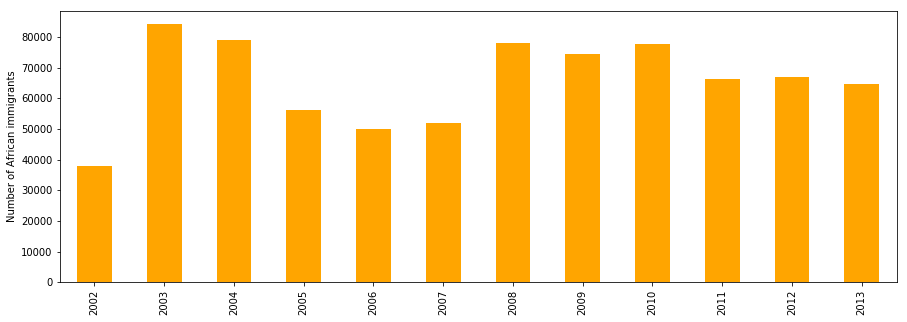

In [130]:
plt.rc('figure',figsize=(15,5))
fig = region_immigrants.loc['Africa'].plot.bar(color='orange')
fig.set_ylabel('Number of African immigrants')


Text(0, 0.5, 'Immigrants')

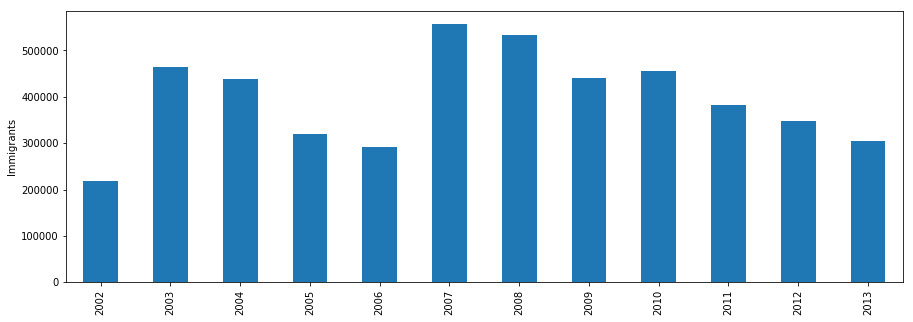

In [129]:
plt.rc('figure',figsize=(15,5))
fig = region_immigrants.sum().plot.bar()
fig.set_ylabel('Immigrants')

Text(0, 0.5, 'Number of immigrants')

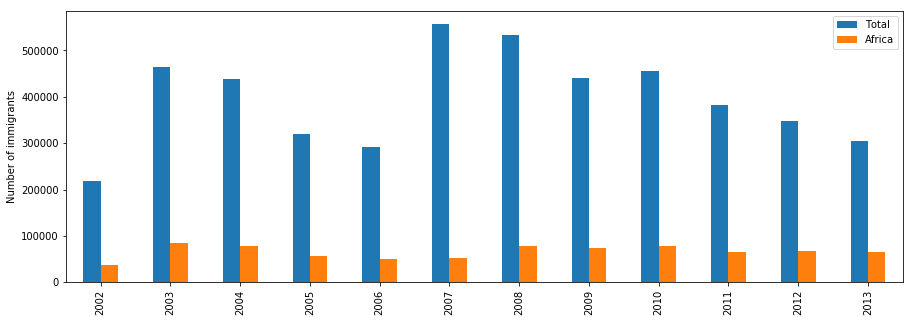

In [68]:
db_bar = pd.DataFrame({'Total':region_immigrants.sum(),'Africa': region_immigrants.loc['Africa']})
fig = db_bar.plot.bar()
fig.set_ylabel('Number of immigrants')

Text(0, 0.5, 'Number of immigrants')

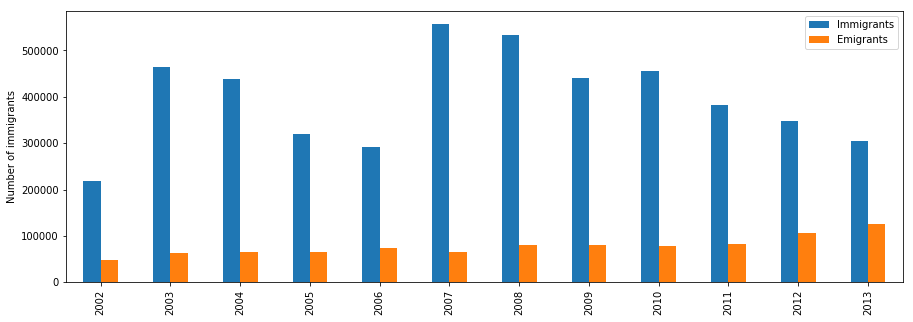

In [100]:
db_bar2 = pd.DataFrame({'Immigrants':region_immigrants.sum(),'Emigrants': region_emigrants.sum()})
fig = db_bar2.plot.bar()
fig.set_ylabel('Number of immigrants')